In [1]:
from classification import *
!pwd

/mnt/c/Users/XTI/Desktop/Yüksek Lisans/MSc_Projects/BM5113 - Bilgisayarla Görme/final_kısım_I


In [2]:
# Veriyi yükle ve eğitim ve test olarak ayır.
trainX, testX, trainY, testY, lb = load_data(dataset_path="./data/all", mode="classification")
trainX.shape, trainY.shape, testX.shape, testY.shape

[INFO] veri yukleniyor...
896


imagePath: ./data/all/WOODEN_SPOON/RAW/woodenspoonraw9.JPG, maskPath: ./data/all/WOODEN_SPOON/BINARY/woodenspoonbinary9.png, className: WOODEN_SPOON: 100%|██████████| 896/896 [02:13<00:00,  6.73it/s]       


((672, 224, 224, 3), (672, 20), (224, 224, 224, 3), (224, 20))

## Classifier

In [3]:
# Modeli oluştur ve eğit
# A şıkkı için tamamlanması gereken model
cnn_model = get_transfer_model()

2022-01-15 20:06:37.766057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-15 20:06:37.773415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-15 20:06:37.773798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-15 20:06:37.774879: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

[INFO] model derleniyor...
Derlendi !!
[INFO] Ana model egitiliyor...
Epoch 1/20


2022-01-15 20:06:40.981722: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8302
2022-01-15 20:06:41.432943: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


21/21 [==============================] - 8s 250ms/step - loss: 2.1817 - accuracy: 0.0640 - val_loss: 0.5374 - val_accuracy: 0.0625
Epoch 2/20
21/21 [==============================] - 6s 267ms/step - loss: 0.7139 - accuracy: 0.0342 - val_loss: 0.6792 - val_accuracy: 0.0804
Epoch 3/20
21/21 [==============================] - 6s 264ms/step - loss: 0.6803 - accuracy: 0.0521 - val_loss: 0.6424 - val_accuracy: 0.0804
Epoch 4/20
21/21 [==============================] - 5s 248ms/step - loss: 0.6784 - accuracy: 0.0714 - val_loss: 0.6765 - val_accuracy: 0.0804
Epoch 5/20
21/21 [==============================] - 6s 274ms/step - loss: 0.6843 - accuracy: 0.0685 - val_loss: 0.6627 - val_accuracy: 0.0759
Epoch 6/20
21/21 [==============================] - 6s 299ms/step - loss: 0.6779 - accuracy: 0.0491 - val_loss: 0.6788 - val_accuracy: 0.0446
Epoch 7/20
21/21 [==============================] - 5s 250ms/step - loss: 0.6871 - accuracy: 0.0506 - val_loss: 0.6425 - val_accuracy: 0.0580
Epoch 8/20
21/21 

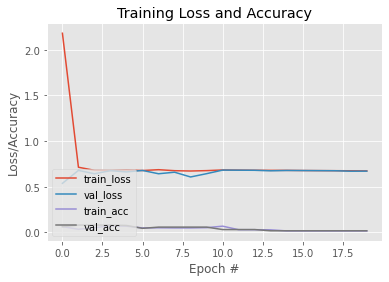

In [4]:
# B şıkkı için oluşturulması gereken model
# cnn_model = get_your_model()
cnn_model = train_model(cnn_model, trainX, trainY, testX, testY)
# Modeli diske kaydet
print("[INFO] Mutfak araç ve gereçleri modelini diske kaydet...")
cnn_model.save("./out/kitchen_equipments_classifier.model", save_format="h5")
print("Bitti !")

In [5]:
# Modeli değerlendir
evaluate_model(cnn_model, testX, testY, lb)

[INFO] model degerlendiriliyor...
0.6555461883544922
               precision    recall  f1-score   support

BOTTLE_OPENER       0.00      0.00      0.00         7
  BREAD_KNIFE       0.00      0.00      0.00         6
   CAN_OPENER       0.00      0.00      0.00         5
DESSERT_SPOON       0.00      0.00      0.00         8
  DINNER_FORK       0.00      0.00      0.00        15
 DINNER_KNIFE       0.00      0.00      0.00        13
   FISH_SLICE       0.00      0.00      0.00        21
KITCHEN_KNIFE       0.00      0.00      0.00        10
        LADLE       0.00      0.00      0.00        14
       MASHER       0.00      0.00      0.00        10
       PEELER       0.00      0.00      0.00         4
 PIZZA_CUTTER       0.02      1.00      0.04         4
POTATO_PEELER       0.00      0.00      0.00         5
SERVING_SPOON       0.00      0.00      0.00        21
   SOUP_SPOON       0.00      0.00      0.00         7
      SPATULA       0.00      0.00      0.00        13
    TEA_SPO

/home/melihozaydin/.virtualenvs/YL/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/melihozaydin/.virtualenvs/YL/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/melihozaydin/.virtualenvs/YL/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu